In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget "https://github.com/Nckflannery/Nckflannery.github.io/blob/master/CSV's/Project.zip?raw=true"

--2019-09-25 18:49:59--  https://github.com/Nckflannery/Nckflannery.github.io/blob/master/CSV's/Project.zip?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Nckflannery/Nckflannery.github.io/raw/master/CSV's/Project.zip [following]
--2019-09-25 18:49:59--  https://github.com/Nckflannery/Nckflannery.github.io/raw/master/CSV's/Project.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nckflannery/Nckflannery.github.io/master/CSV's/Project.zip [following]
--2019-09-25 18:49:59--  https://raw.githubusercontent.com/Nckflannery/Nckflannery.github.io/master/CSV's/Project.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.gith

In [3]:
!unzip 'Project.zip?raw=true'

Archive:  Project.zip?raw=true
  inflating: USPOP.csv               
  inflating: LandPrice.csv           
  inflating: alltablesGEcrops.csv    
  inflating: dietary-compositions.csv  
  inflating: Agriculture.csv         
  inflating: Yields.csv              
  inflating: Yields1.csv             
  inflating: Imports.csv             
  inflating: Area_Prod_Veg.csv       


# Population vs Agricultural Land Area

In [0]:
df_ag = pd.read_csv('Agriculture.csv', skipfooter=5)
df_pop = pd.read_csv('USPOP.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [0]:
df_ag.head()

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,United States of America,Area,2016,1000 ha,405862.5,Fm
1,United States of America,Area,2015,1000 ha,405862.5,Fm
2,United States of America,Area,2014,1000 ha,407865.5,Fm
3,United States of America,Area,2013,1000 ha,405841.7,Fm
4,United States of America,Area,2012,1000 ha,408706.5,Fm


In [0]:
df_ag = df_ag.drop(['Country or Area', 'Element', 'Unit', 'Value Footnotes'], 
                   axis=1)
df_ag['Value'] = df_ag['Value']*1000

In [0]:
df_ag.head()

,Year,Value
0,2016,405862500.0
1,2015,405862500.0
2,2014,407865500.0
3,2013,405841700.0
4,2012,408706500.0


In [0]:
df_pop.head()

,DATE,POPTOTUSA647NWDB
0,1960-01-01,180671000.0
1,1961-01-01,183691000.0
2,1962-01-01,186538000.0
3,1963-01-01,189242000.0
4,1964-01-01,191889000.0


In [0]:
df_pop['DATE'] = df_pop['DATE'].str.replace('-01-01', '').astype(float)
df_pop = df_pop.rename(columns={'DATE':'Year', 'POPTOTUSA647NWDB':'Population'})
df_pop.head()

,Year,Population
0,1960.0,180671000.0
1,1961.0,183691000.0
2,1962.0,186538000.0
3,1963.0,189242000.0
4,1964.0,191889000.0


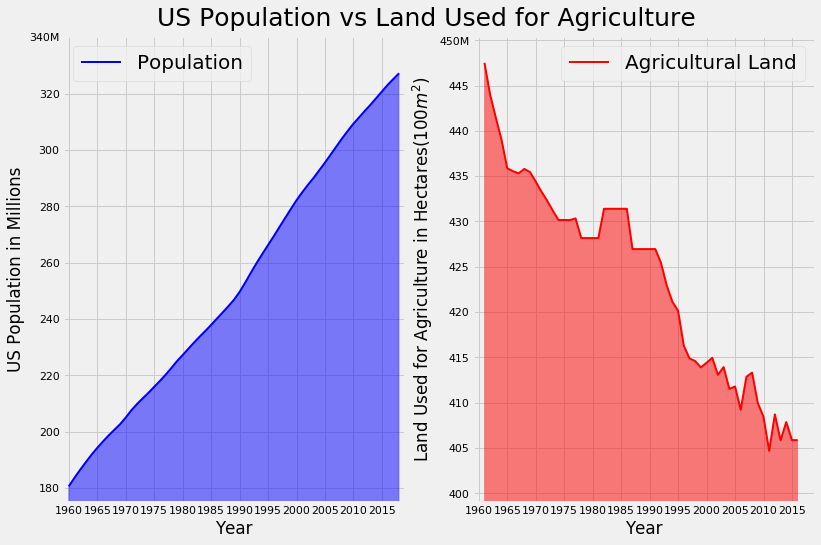

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

  sns.lineplot(data=df_pop, x='Year', y='Population', color='b', lw=2, ax=ax1, 
               label='Population')
  sns.lineplot(data=df_ag, x='Year', y='Value', color='r', lw=2, ax=ax2, 
               label='Agricultural Land')
  
  ax1.set_xlim(1959, 2019)
  ax2.set_xlim(1959, 2019)

  ax1.set_ylim(175000000, 340500000)
  ax2.set_ylim(399000000, 450500000)

  ax1.set_yticks(range(180000000, 340000005, 20000000))
  ax1.set_yticklabels(['180','200','220','240','260','280','300','320','340M'],
                      fontsize=11)
  ax1.set_ylabel('US Population in Millions')

  ax2.set_yticks(range(400000000, 450000005, 5000000))
  ax2.set_yticklabels(['400','405','410','415','420','425','430','435','440',
                       '445','450M'], fontsize=11)
  ax2.set_ylabel('Land Used for Agriculture in Hectares(100$m^2$)')

  ax1.set_xticks(range(1960, 2020, 5))
  ax1.set_xticklabels(range(1960, 2020, 5),fontsize=11)
  ax2.set_xticks(range(1960, 2020, 5))
  ax2.set_xticklabels(range(1960, 2020, 5),fontsize=11)
  
  fig.suptitle('US Population vs Land Used for Agriculture', y=.93, 
               fontsize=25)

  ax1.fill_between(df_pop['Year'], 0, df_pop['Population'], color='b', alpha=.5)
  ax2.fill_between(df_ag['Year'], 0, df_ag['Value'], color='r', alpha=.5)

  ax1.legend(fontsize=20)
  ax2.legend(fontsize=20)
  plt.show()

In [0]:
|

# Yields

##Livestock

In [0]:
df_livestock = pd.read_csv('Yields.csv')

In [0]:
df_livestock.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Livestock Primary,United States of America,Yield/Carcass Weight,"Meat, cattle",1961,hg/An,2149
1,Livestock Primary,United States of America,Yield/Carcass Weight,"Meat, cattle",1962,hg/An,2132
2,Livestock Primary,United States of America,Yield/Carcass Weight,"Meat, cattle",1963,hg/An,2236
3,Livestock Primary,United States of America,Yield/Carcass Weight,"Meat, cattle",1964,hg/An,2246
4,Livestock Primary,United States of America,Yield/Carcass Weight,"Meat, cattle",1965,hg/An,2187


In [0]:
df_livestock = df_livestock.drop(['Domain', 'Area', 'Element'], axis=1)
df_livestock.head()

,Item,Year,Unit,Value
0,"Meat, cattle",1961,hg/An,2149
1,"Meat, cattle",1962,hg/An,2132
2,"Meat, cattle",1963,hg/An,2236
3,"Meat, cattle",1964,hg/An,2246
4,"Meat, cattle",1965,hg/An,2187


In [0]:
df_livestock.tail()

,Item,Year,Unit,Value
109,"Meat, Poultry",2013,0.1g/An,22535
110,"Meat, Poultry",2014,0.1g/An,22837
111,"Meat, Poultry",2015,0.1g/An,23140
112,"Meat, Poultry",2016,0.1g/An,23403
113,"Meat, Poultry",2017,0.1g/An,23516


In [0]:
df_poultry = df_livestock[df_livestock['Item'] == 'Meat, Poultry']
df_cattle = df_livestock[df_livestock['Item'] == 'Meat, cattle']

In [0]:
y_poultry = df_poultry['Value']/10000
y_cattle = df_cattle['Value']/10

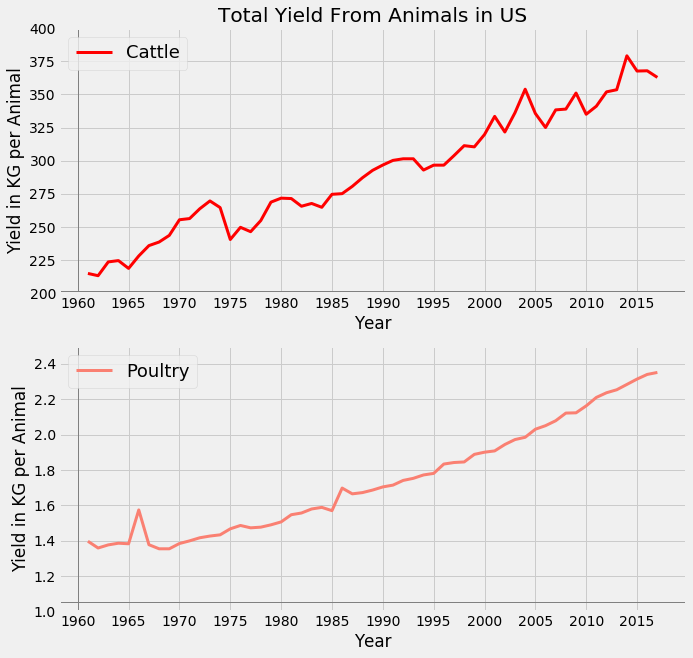

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10))

  ax1.set_title('Total Yield From Animals in US')

  sns.lineplot(data=df_cattle, x='Year', y=y_cattle, color='red', lw=3, 
               ax=ax1, label='Cattle')  
  sns.lineplot(data=df_poultry, x='Year', y=y_poultry, color='salmon', lw=3, 
               ax=ax2, label='Poultry')  

  ax1.set_xticks(range(1960, 2016, 5))
  ax2.set_xticks(range(1960, 2016, 5))

  ax1.set_ylim(200, 400)
  ax2.set_ylim(1, 2.5)

  ax1.set_ylabel('Yield in KG per Animal')
  ax2.set_ylabel('Yield in KG per Animal')

  ax1.axvline(x=1960, color='gray', lw=1)
  ax2.axvline(x=1960, color='gray', lw=1)
  ax1.axhline(y=202, color='gray', lw=1)
  ax2.axhline(y=1.05, color='gray', lw=1)

  ax1.legend(loc=2, fontsize=18)
  ax2.legend(loc=2, fontsize=18)

  plt.show()

## Vegetable

In [0]:
df_veg = pd.read_csv('Yields1.csv')

In [0]:
df_veg.tail()

,Domain,Area,Element,Item,Year,Unit,Value
280,Crops,United States of America,Yield,Vegetables Primary,2013,hg/ha,328498
281,Crops,United States of America,Yield,Vegetables Primary,2014,hg/ha,348050
282,Crops,United States of America,Yield,Vegetables Primary,2015,hg/ha,369078
283,Crops,United States of America,Yield,Vegetables Primary,2016,hg/ha,350377
284,Crops,United States of America,Yield,Vegetables Primary,2017,hg/ha,341330


In [0]:
df_vegetables = df_veg[df_veg['Item'] == 'Vegetables Primary']
df_fruit = df_veg[df_veg['Item'] == 'Fruit Primary']

In [0]:
y_veg = df_vegetables['Value']/10
y_fruit = df_fruit['Value']/10

## Combine

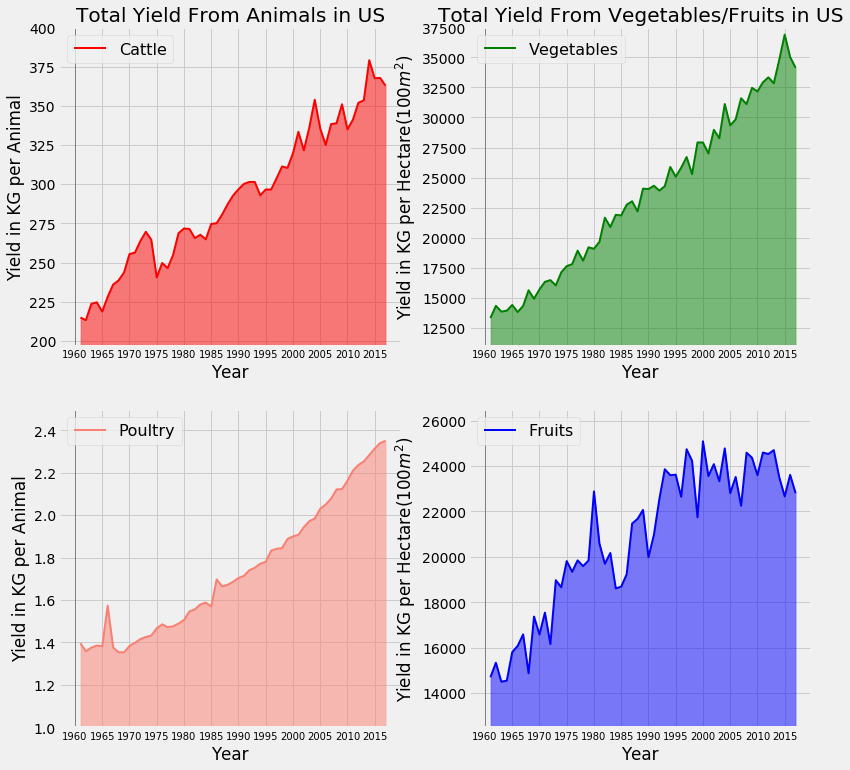

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,12))

  ax1.set_title('Total Yield From Animals in US')
  ax2.set_title('Total Yield From Vegetables/Fruits in US')

  sns.lineplot(data=df_cattle, x='Year', y=y_cattle, color='red', lw=2, 
               ax=ax1, label='Cattle')  
  sns.lineplot(data=df_poultry, x='Year', y=y_poultry, color='salmon', lw=2, 
               ax=ax3, label='Poultry')
  sns.lineplot(data=df_vegetables, x='Year', y=y_veg, color='green', lw=2, 
               ax=ax2, label='Vegetables')  
  sns.lineplot(data=df_fruit, x='Year', y=y_fruit, color='blue', lw=2, 
               ax=ax4, label='Fruits')  
  
  ax1.set_xticks(range(1960, 2016, 5))
  ax1.set_xticklabels(range(1960, 2016, 5), fontsize=10)
  ax2.set_xticks(range(1960, 2016, 5))
  ax2.set_xticklabels(range(1960, 2016, 5), fontsize=10)
  ax3.set_xticks(range(1960, 2016, 5))
  ax3.set_xticklabels(range(1960, 2016, 5), fontsize=10)
  ax4.set_xticks(range(1960, 2016, 5))
  ax4.set_xticklabels(range(1960, 2016, 5), fontsize=10)

  ax1.set_ylim(197, 400)
  ax2.set_ylim(11000, 37500)
  ax2.set_yticks(range(12500, 37600, 2500))
  ax3.set_ylim(1, 2.5)
  ax4.set_ylim(12500, 26500)
  ax4.set_yticks(range(14000, 26005, 2000))

  ax1.set_ylabel('Yield in KG per Animal')
  ax2.set_ylabel('Yield in KG per Hectare(100$m^2$)')
  ax3.set_ylabel('Yield in KG per Animal')
  ax4.set_ylabel('Yield in KG per Hectare(100$m^2$)')

  ax1.axvline(x=1960, color='gray', lw=1)
  ax2.axvline(x=1960, color='gray', lw=1)
  ax3.axvline(x=1960, color='gray', lw=1)
  ax4.axvline(x=1960, color='gray', lw=1)

  ax1.legend(loc=2, fontsize=16)
  ax2.legend(loc=2, fontsize=16)
  ax3.legend(loc=2, fontsize=16)
  ax4.legend(loc=2, fontsize=16)

  ax1.fill_between(df_cattle['Year'], 0, y_cattle, color='red', alpha=.5)
  ax2.fill_between(df_vegetables['Year'], 0, y_veg, color='green', alpha=.5)
  ax3.fill_between(df_poultry['Year'], 0, y_poultry, color='salmon', alpha=.5)
  ax4.fill_between(df_fruit['Year'], 0, y_fruit, color='blue', alpha=.5)

  plt.show()

#Imports

In [0]:
df_imports = pd.read_csv('Imports.csv')

In [0]:
df_imports['Item'].value_counts()

Cereals - Excluding Beer    53
Oilcrops                    53
Alcoholic Beverages         53
Milk - Excluding Butter     53
Vegetables                  53
Starchy Roots               53
Fruits - Excluding Wine     53
Vegetable Oils              53
Name: Item, dtype: int64

In [0]:
df_imports = df_imports.rename({'Item':'Imported Items'}, axis=1)

In [0]:
avg_1961 = df_imports[df_imports['Year'] == 1961].mean()
avg_2013 = df_imports[df_imports['Year'] == 2013].mean()

In [0]:
y_1961 = avg_1961['Value']
y_2013 = avg_2013['Value']

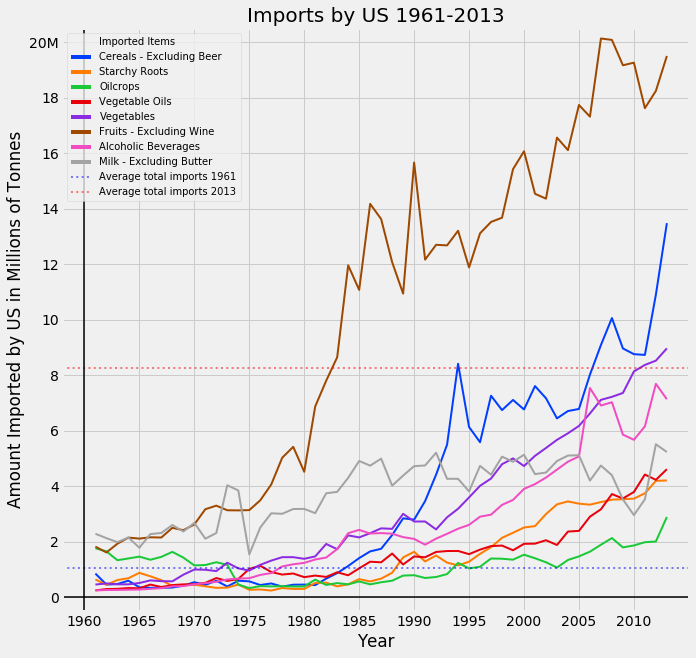

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(10,10))

  sns.lineplot(data=df_imports, x='Year', y='Value', hue='Imported Items', 
               lw=2, ax=ax, palette='bright')
  ax.set_title('Imports by US 1961-2013', size=20)
  
  ax.set_xticks(range(1960, 2013, 5))
  ax.set_xticklabels(range(1960, 2013, 5))
  ax.set_xlim(1958, 2015)
  
  ax.axhline(y=y_1961, color='b', lw=2, linestyle=':', alpha=.5, 
             label='Average total imports 1961')
  ax.axhline(y=y_2013, color='r', lw=2, linestyle=':', alpha=.5,
             label='Average total imports 2013')
  ax.axhline(y=0, lw=1.5, color='black')
  ax.axvline(x=1960, lw=1.5, color='black')
  
  ax.set_ylabel('Amount Imported by US in Millions of Tonnes')
  ax.set_ylim(-500, 20500)
  ax.set_yticks(range(0, 22000, 2000))
  ax.set_yticklabels(['0','2','4','6','8','10','12','14','16','18','20M'])
  
  ax.legend(loc=2, fontsize=10)

  plt.show()

# Genetic Engineering

In [0]:
df_GE = pd.read_csv('alltablesGEcrops.csv')

In [0]:
df_GE.head()

,State,Crop,Crop title,Variety,Year,Unit,Value
0,Illinois,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2000,Percent of all corn planted,13
1,Illinois,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2001,Percent of all corn planted,12
2,Illinois,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2002,Percent of all corn planted,18
3,Illinois,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2003,Percent of all corn planted,23
4,Illinois,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2004,Percent of all corn planted,26


In [0]:
df_ge = df_GE[df_GE['State'] == 'U.S.']
df_ge.head()

,State,Crop,Crop title,Variety,Year,Unit,Value
1120,U.S.,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2000,Percent of all corn planted,18
1121,U.S.,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2001,Percent of all corn planted,18
1122,U.S.,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2002,Percent of all corn planted,22
1123,U.S.,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2003,Percent of all corn planted,25
1124,U.S.,Corn,Genetically engineered (GE) corn varieties,Insect-resistant (Bt) only ...,2004,Percent of all corn planted,27


In [0]:
df_ge = df_ge.drop(['State', 'Crop title', 'Unit'], axis=1)
df_ge = df_ge[df_ge['Variety'].str.contains('All GE varieties')]

In [0]:
df_ge.head()

,Crop,Variety,Year,Value
1180,Corn,All GE varieties 3/,2000,25
1181,Corn,All GE varieties 3/,2001,26
1182,Corn,All GE varieties 3/,2002,34
1183,Corn,All GE varieties 3/,2003,40
1184,Corn,All GE varieties 3/,2004,47


In [0]:
df_ge['Value'] = df_ge['Value'].astype(int)

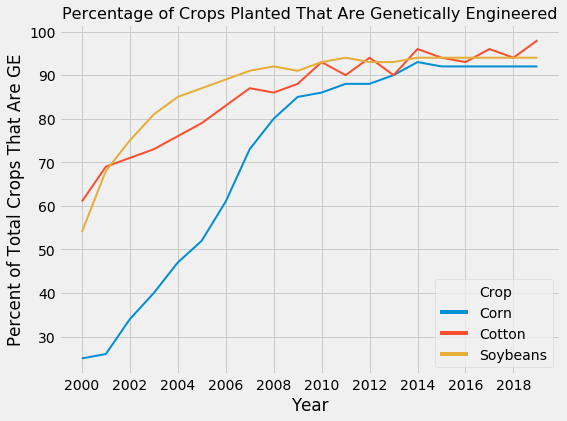

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8,6))

  ax.set_title('Percentage of Crops Planted That Are Genetically Engineered', size=16)
  sns.lineplot(data=df_ge, x='Year', y='Value', hue='Crop', lw=2)
  ax.set_xticks(range(2000, 2020, 2))

  ax.set_ylabel('Percent of Total Crops That Are GE')

# Diet

In [0]:
df_diet = pd.read_csv('dietary-compositions.csv')

In [0]:
df_diet.head()

,Entity,Code,Year,Other (kilocalories per person per day),Sugar (kilocalories per person per day),Oils & Fats (kilocalories per person per day),Meat (kilocalories per person per day),Dairy & Eggs (kilocalories per person per day),Fruits & Vegetables (kilocalories per person per day),Starchy Roots (kilocalories per person per day),Pulses (kilocalories per person per day),Cereals & Grains (kilocalories per person per day),Alcoholic Beverages (kcal/person/day)
0,Afghanistan,AFG,1961,13,51,92,88,102,82,25,16,2530,0.0
1,Afghanistan,AFG,1962,12,45,98,88,101,76,22,17,2458,0.0
2,Afghanistan,AFG,1963,13,47,106,91,110,79,23,17,2212,0.0
3,Afghanistan,AFG,1964,11,55,102,93,110,95,24,18,2445,0.0
4,Afghanistan,AFG,1965,13,57,105,95,118,95,24,18,2431,0.0


In [0]:
df_diet=df_diet[df_diet['Entity'] == 'United States']

In [0]:
df_diet.head()

,Entity,Code,Year,Other (kilocalories per person per day),Sugar (kilocalories per person per day),Oils & Fats (kilocalories per person per day),Meat (kilocalories per person per day),Dairy & Eggs (kilocalories per person per day),Fruits & Vegetables (kilocalories per person per day),Starchy Roots (kilocalories per person per day),Pulses (kilocalories per person per day),Cereals & Grains (kilocalories per person per day),Alcoholic Beverages (kcal/person/day)
7708,United States,USA,1961,21,515,532,355,450,144,90,36,628,109.0
7709,United States,USA,1962,21,520,526,359,439,146,87,37,612,111.0
7710,United States,USA,1963,23,509,534,368,440,138,90,37,609,112.0
7711,United States,USA,1964,22,525,558,377,447,138,91,38,616,114.0
7712,United States,USA,1965,24,533,553,367,450,141,90,30,616,118.0


In [0]:
df_diet = df_diet.rename(columns=lambda x: x.replace('(kilocalories per person per day)', ''))
df_diet = df_diet.rename(columns=lambda x: x.replace('(kcal/person/day)', ''))
df_diet = df_diet.drop(['Entity', 'Code'], axis=1)

In [0]:
df_diet.tail()

,Year,Other,Sugar,Oils & Fats,Meat,Dairy & Eggs,Fruits & Vegetables,Starchy Roots,Pulses,Cereals & Grains,Alcoholic Beverages,Mean
7756,2009,28,564,862,467,431,191,93,40,805,164.0,514.000000
7757,2010,32,570,870,469,425,181,91,38,807,167.0,514.545455
7758,2011,31,589,895,461,417,181,93,30,794,158.0,514.545455
7759,2012,27,597,899,457,426,186,99,36,799,161.0,518.090909
7760,2013,30,600,890,459,424,188,92,39,801,159.0,517.727273


In [0]:
cal_1961 = df_diet[df_diet['Year'] == 1961]
cal_2013 = df_diet[df_diet['Year'] == 2013]

In [0]:
cal_1961 = cal_1961.drop('Year', axis=1)
melt_1961 = cal_1961.melt()

In [0]:
melt_1961

,variable,value
0,Other,21.0
1,Sugar,515.0
2,Oils & Fats,532.0
3,Meat,355.0
4,Dairy & Eggs,450.0
5,Fruits & Vegetables,144.0
6,Starchy Roots,90.0
7,Pulses,36.0
8,Cereals & Grains,628.0
9,Alcoholic Beverages,109.0


In [0]:
cal_2013 = cal_2013.drop('Year', axis=1)
melt_2013 = cal_2013.melt()

In [0]:
melt_2013

,variable,value
0,Other,30.0
1,Sugar,600.0
2,Oils & Fats,890.0
3,Meat,459.0
4,Dairy & Eggs,424.0
5,Fruits & Vegetables,188.0
6,Starchy Roots,92.0
7,Pulses,39.0
8,Cereals & Grains,801.0
9,Alcoholic Beverages,159.0


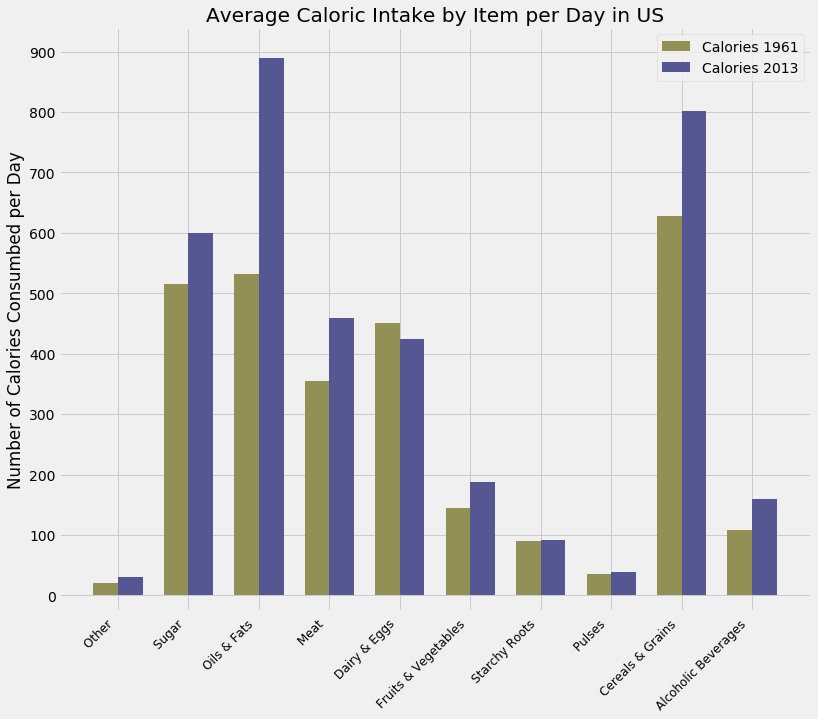

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(12,10))

  width = .35

  ax.bar('variable', 'value', -width, data=melt_1961, color='#929055', 
         align='edge', label='Calories 1961')
  ax.bar('variable', 'value', +width, data=melt_2013, color='#555792', 
         align='edge', label='Calories 2013')
  
  ax.set_title('Average Caloric Intake by Item per Day in US')

  ax.set_yticks(range(0,1000, 100))
  ax.set_ylabel('Number of Calories Consumbed per Day')

  ax.set_xticklabels(melt_1961['variable'], size=12, rotation=45, ha='right')
  ax.set_ylim(-25, 940)

  ax.legend(loc=0)

  plt.show()

# Price of Farmland

In [0]:
df_price = pd.read_csv('LandPrice.csv')

In [0]:
df_price.head()

,Year,Value per Acre
0,1980,737
1,1981,734
2,1982,730
3,1983,725
4,1984,720


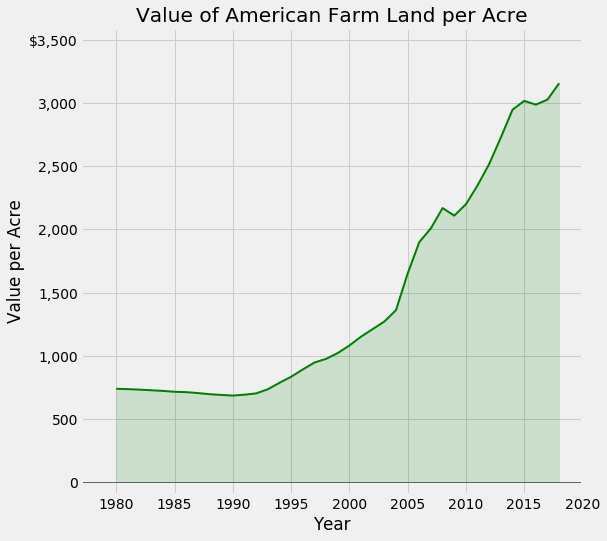

In [0]:
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8,8))

  sns.lineplot(x='Year', y='Value per Acre', data=df_price, lw=2, color='g')

  ax.set_ylim(-100, 3600)
  ax.set_yticks(range(0, 3600, 500))
  ax.set_yticklabels(['0','500','1,000','1,500','2,000','2,500','3,000','$3,500'])

  ax.set_xlim(1977, 2020)

  ax.axhline(y=0, color='black', lw=.5)

  ax.set_title('Value of American Farm Land per Acre')
  ax.fill_between(df_price['Year'], 0, df_price['Value per Acre'], 
                   color='g', alpha=.15)